In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
from matplotlib import pyplot as plt
% matplotlib inline

In [3]:
data_mean = 3.
data_stddev = 2.

In [4]:
g_input_size = 1
g_hidden_size = 75
g_output_size = 1
d_input_size = 100
d_hidden_size = 50
d_output_size = 1
minibatch_size = d_input_size

In [5]:
d_learning_rate = 2e-4
g_learning_rate = 2e-4
optim_betas = (0.9, 0.999)
num_epochs = 30000
print_interval = 1000
d_steps = 1
g_steps = 1

In [6]:
def get_distribution_sampler(mu, sigma):
    return lambda n: torch.Tensor(np.random.normal(mu, sigma, (1,n)))

In [7]:
def get_generator_input_sampler():
    return lambda m, n: torch.rand(m, n)

In [8]:
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.map1 = nn.Linear(input_size, hidden_size)
        self.map2 = nn.Linear(hidden_size, hidden_size)
        self.map3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = F.elu(self.map1(x))
        x = F.sigmoid(self.map2(x))
        return self.map3(x)

class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Discriminator, self).__init__()
        self.map1 = nn.Linear(input_size, hidden_size)
        self.map2 = nn.Linear(hidden_size, hidden_size)
        self.map3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = F.elu(self.map1(x))
        x = F.elu(self.map2(x))
        return F.sigmoid(self.map3(x))

In [9]:
def extract(v):
    return v.data.storage().tolist()
    
def stats(v):
    return [np.mean(v), np.std(v)]

In [10]:
d_sampler = get_distribution_sampler(data_mean, data_stddev)
gi_sampler = get_generator_input_sampler()

In [11]:
D = Discriminator(d_input_size, d_hidden_size, d_output_size)
G = Generator(g_input_size, g_hidden_size, g_output_size)

In [12]:
criterion = nn.BCELoss()
g_optimizer = optim.Adam(G.parameters(), lr=d_learning_rate, betas=optim_betas)
d_optimizer = optim.Adam(D.parameters(), lr=g_learning_rate, betas=optim_betas)

0: D: 0.68/0.72 G: 0.67 (Real: [2.927029596865177, 1.8938742926741816], Fake: [-0.25217463105916976, 0.0028148770985909526]) 


/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


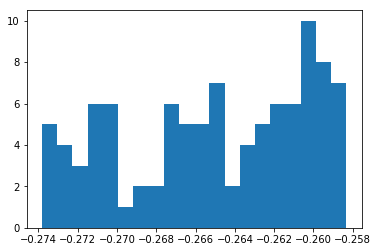

1000: D: 0.35/0.12 G: 2.42 (Real: [2.8304214917123316, 2.1289491914834175], Fake: [5.252042095661164, 0.5842275728890715]) 


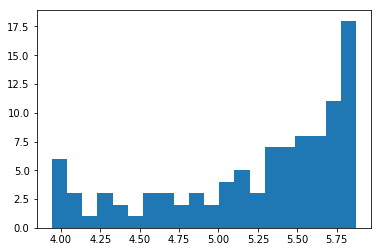

2000: D: 0.66/0.53 G: 0.60 (Real: [3.080117758139968, 2.0045071184881906], Fake: [3.0500971110910178, 3.2151521283269524]) 


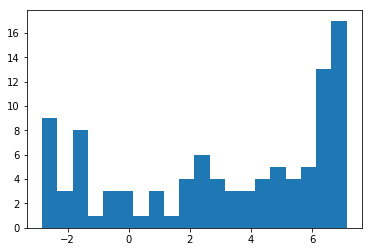

3000: D: 0.54/0.62 G: 0.59 (Real: [3.015790331894532, 2.0335812992003763], Fake: [3.1305652590096, 1.7983776163419247]) 


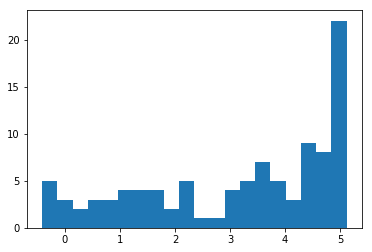

4000: D: 0.57/0.61 G: 0.73 (Real: [2.788941143974662, 2.080452514218498], Fake: [3.1066796654462814, 1.2958460769453606]) 


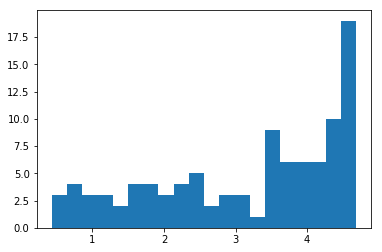

5000: D: 0.65/0.61 G: 0.85 (Real: [2.895148306353949, 2.0248371892856096], Fake: [3.152653221525252, 2.5915826958863604]) 


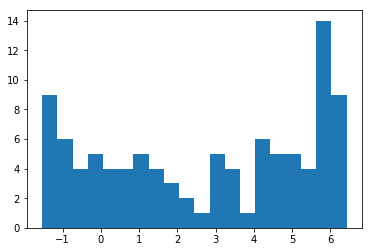

6000: D: 0.64/0.73 G: 0.67 (Real: [2.992181226089597, 2.177145308113828], Fake: [3.0999646961688994, 1.3972500780581498]) 


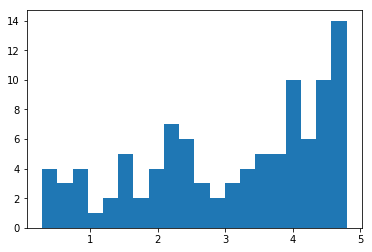

7000: D: 0.63/0.66 G: 0.73 (Real: [3.0587843360751865, 2.0218921352421315], Fake: [3.033839449621737, 1.901719131503995]) 


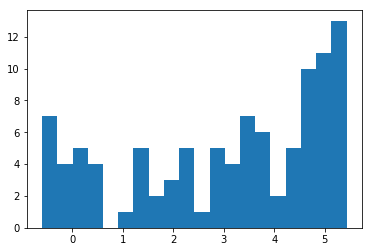

8000: D: 0.71/0.73 G: 0.71 (Real: [2.9325650659855453, 2.197240334882568], Fake: [3.4805614511296152, 2.375643887715998]) 


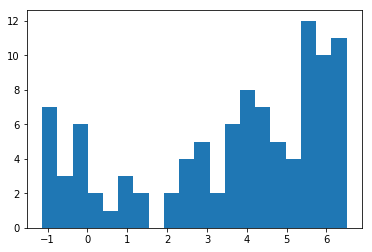

9000: D: 0.71/0.68 G: 0.74 (Real: [2.9530906436033546, 2.227199018419722], Fake: [3.3583263985067604, 2.066199347798934]) 


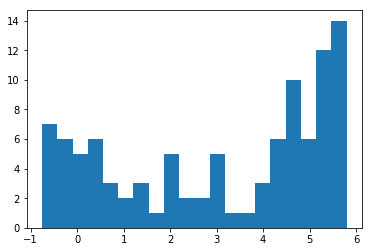

10000: D: 0.64/0.66 G: 0.75 (Real: [2.6327137646824124, 2.0834493067114983], Fake: [2.677473462969065, 1.9529812789674008]) 


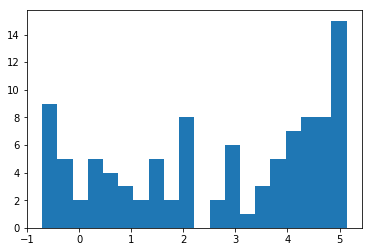

11000: D: 0.64/0.66 G: 0.63 (Real: [3.148240342512727, 1.9185799902994534], Fake: [2.7388116109743716, 1.797119658033972]) 


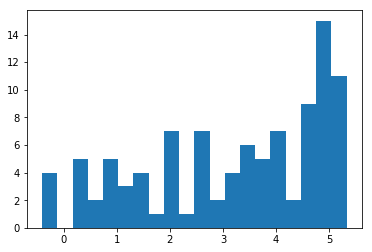

12000: D: 0.75/0.73 G: 0.68 (Real: [3.256065258681774, 1.8018052304956762], Fake: [2.7896856348216534, 1.5844720574633366]) 


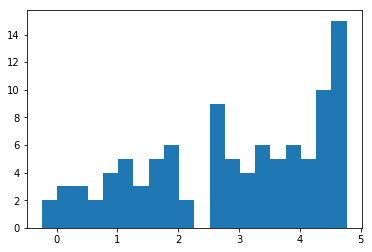

13000: D: 0.72/0.69 G: 0.75 (Real: [3.4123120576143267, 1.7646278325583318], Fake: [2.931527361609042, 1.7745514349439775]) 


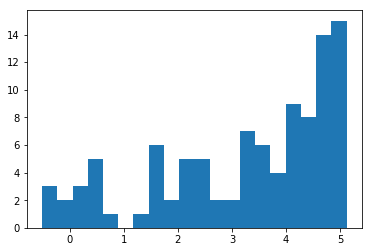

14000: D: 0.60/0.61 G: 0.63 (Real: [3.1939901339635255, 1.8461464501883231], Fake: [3.0089057956635954, 2.17652810142049]) 


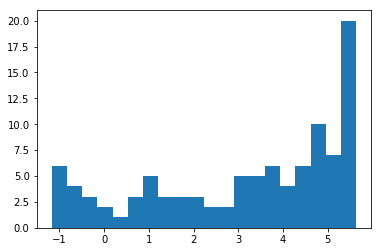

15000: D: 0.78/0.68 G: 0.68 (Real: [3.021609153151512, 2.289475279423231], Fake: [3.5558290450274943, 2.238707147762324]) 


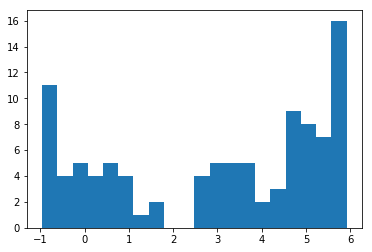

16000: D: 0.72/0.71 G: 0.76 (Real: [2.934156445208937, 1.9165178090989794], Fake: [3.2898716043680905, 1.8697941345445777]) 


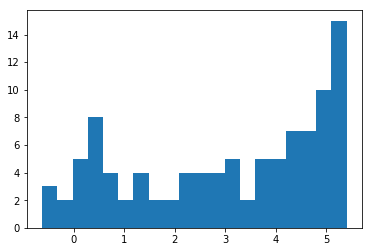

17000: D: 0.67/0.69 G: 0.68 (Real: [2.600958656221628, 1.871553346419687], Fake: [3.047680390402675, 1.7749784222200247]) 


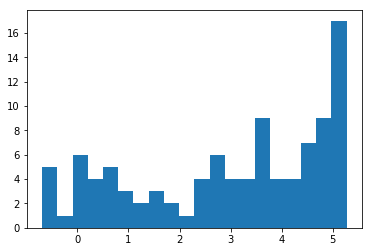

18000: D: 0.69/0.62 G: 0.77 (Real: [3.3141213580965996, 2.1085692695413], Fake: [3.2248768272995947, 1.941299791608162]) 


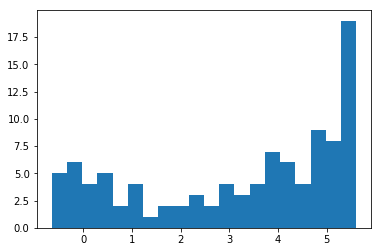

19000: D: 0.61/0.71 G: 0.68 (Real: [3.0407338290661574, 1.778963751931864], Fake: [2.869208667241037, 2.1516769681549097]) 


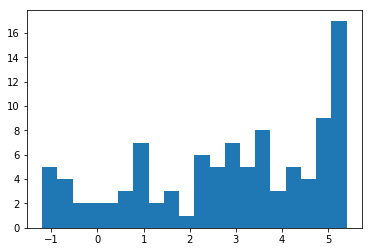

20000: D: 0.69/0.72 G: 0.66 (Real: [3.058139142654836, 2.027603955999324], Fake: [3.2235243672132494, 2.2747733629692553]) 


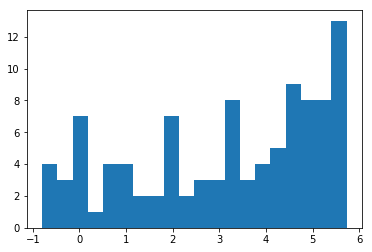

21000: D: 0.62/0.75 G: 0.70 (Real: [2.8052806313335896, 2.2721461446556224], Fake: [2.7371132318675517, 2.0862498788722768]) 


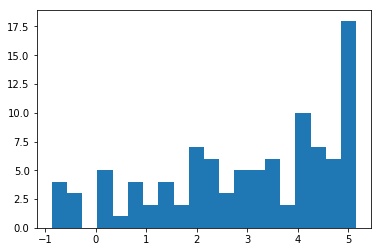

22000: D: 0.66/0.68 G: 0.71 (Real: [2.911183687141165, 2.1862689843143412], Fake: [3.093084079921246, 1.6287010947611893]) 


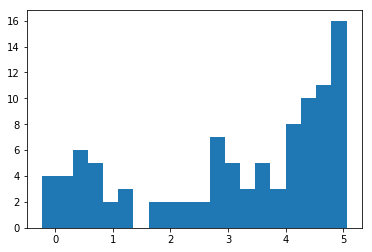

23000: D: 0.72/0.71 G: 0.67 (Real: [2.7823464256711303, 2.1390488161922883], Fake: [2.7970249571651222, 2.0186479269131072]) 


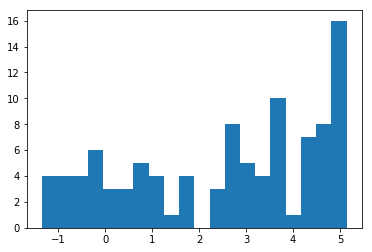

24000: D: 0.71/0.65 G: 0.73 (Real: [2.9507639525830744, 2.080856718259851], Fake: [3.2605094327405095, 1.7733209289202416]) 


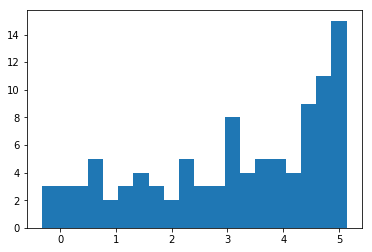

25000: D: 0.70/0.69 G: 0.70 (Real: [2.820656118984334, 2.4375050173650417], Fake: [2.7709417124837636, 1.7962979442672222]) 


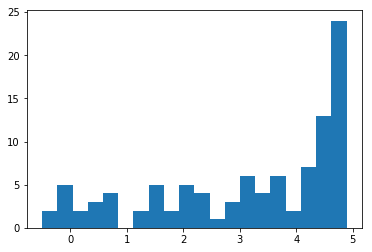

26000: D: 0.72/0.72 G: 0.65 (Real: [3.2231080520153044, 2.133959897636381], Fake: [3.1082948764413594, 2.1918751608276494]) 


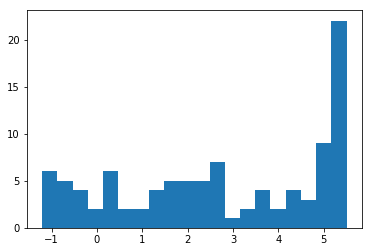

27000: D: 0.68/0.66 G: 0.70 (Real: [3.208221448585391, 2.2023282971124862], Fake: [3.2640068477392195, 1.6345266240065017]) 


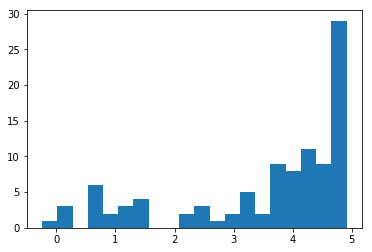

28000: D: 0.69/0.67 G: 0.68 (Real: [3.280468587204814, 2.038021285750667], Fake: [2.8366608415544032, 1.9292110648891578]) 


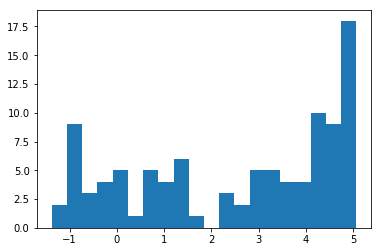

29000: D: 0.73/0.71 G: 0.71 (Real: [3.129357338878326, 1.8534608376322337], Fake: [2.9006170557439326, 2.3848997818060886]) 


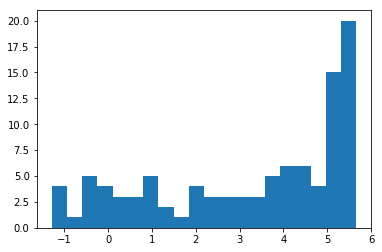

In [13]:
for epoch in range(num_epochs):
    for d_index in range(d_steps):
        D.zero_grad()
        d_real_data = d_sampler(d_input_size)
        d_real_decision = D(d_real_data)
        d_real_error = criterion(d_real_decision, torch.ones(1))
        d_real_error.backward()
        
        d_gen_input = gi_sampler(minibatch_size, g_input_size)
        d_fake_data = G(d_gen_input).detach()
        d_fake_decision = D(d_fake_data.t())
        d_fake_error = criterion(d_fake_decision, torch.zeros(1))
        d_fake_error.backward()
        
        d_optimizer.step()
        
    for g_index in range(g_steps):
        G.zero_grad()
        
        gen_input = gi_sampler(minibatch_size, g_input_size)
        g_fake_data = G(gen_input)
        dg_fake_decision = D(g_fake_data.t())
        g_error = criterion(dg_fake_decision, torch.ones(1))
        g_error.backward()
        
        g_optimizer.step()
    if epoch % print_interval == 0 :
        print("%s: D: %.2f/%.2f G: %.2f (Real: %s, Fake: %s) " % (epoch,
                                                            extract(d_real_error)[0],
                                                            extract(d_fake_error)[0],
                                                            extract(g_error)[0],
                                                            stats(extract(d_real_data)),
                                                            stats(extract(d_fake_data))))
        data_to_show = G(gen_input)
        plt.hist(data_to_show.detach().numpy(), bins=20)
        plt.show()